In [53]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [54]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [55]:
df= pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [56]:
df = df.drop(["sepal length (cm)","sepal width (cm)"],axis="columns")
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


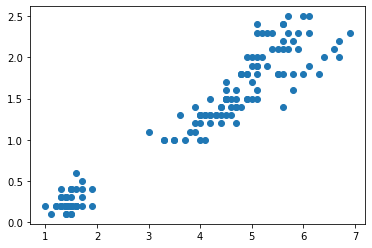

In [57]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"])

In [58]:
km =KMeans(n_clusters=3)
y_predicted= km.fit_predict(df[["petal length (cm)","petal width (cm)"]])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [59]:
df["cluster"]=y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


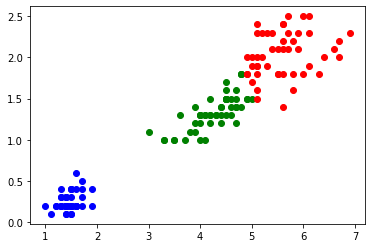

In [61]:
df0 =df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color="green")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="blue")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color="red")


In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [63]:
scaler.fit(df[["petal width (cm)"]])
df["petal width (cm)"]=scaler.transform(df[["petal width (cm)"]])

scaler.fit(df[["petal length (cm)"]])
df["petal length (cm)"]=scaler.transform(df[["petal length (cm)"]])
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


### Elbow Method

In [65]:
k_rang=range(1,10)
sse=[]
for k in  k_rang:
    km=KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [66]:
sse

[128.26168655306054,
 38.39998331521834,
 1.8203046602036208,
 1.325516555185281,
 0.9084781144602997,
 0.7463711621280662,
 0.6216060524141169,
 0.5429760297652515,
 0.47939765649888055]

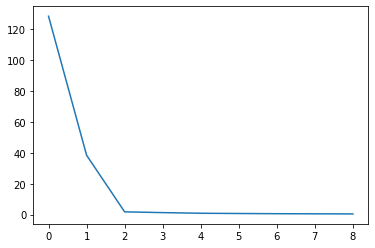

In [67]:
plt.plot(sse)

In [68]:
km =KMeans(n_clusters=3)
y_predicted= km.fit_predict(df[["petal length (cm)","petal width (cm)"]])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [69]:
df["cluster"]=y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


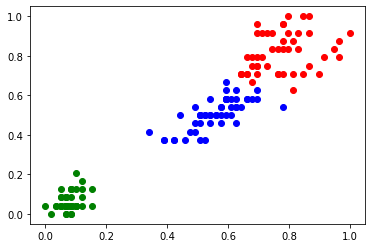

In [70]:
df0 =df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color="green")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="blue")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color="red")